In [61]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def format_csv(path : str):
    dataset_input  = pd.read_csv(path)
    domains_unique = dataset_input['domain'].unique()
    output_dict = {'timestamp':list()}
    for domain in domains_unique: output_dict[domain]=list()
    for timestamp in dataset_input['timestamp'].unique():
        x = dataset_input.loc[dataset_input['timestamp'] == timestamp]
        output_dict['timestamp'].append(timestamp)
        for domain in domains_unique: 
            serie = x.loc[x['domain'] == domain]['measure']
            output_dict[domain].append(serie.iloc[0]) if len(serie)>0 else output_dict[domain].append(np.nan)
    output_df = pd.DataFrame(output_dict)
    for key in output_df.keys():
        if key not in ['timestamp', 'phase']: output_df[key] = pd.to_numeric(output_df[key], errors='coerce', downcast="float")
    return output_df

def merge_datasets(input_datasets : dict):
    for name, dataset in input_datasets.items(): dataset['dataset'] = name
    return pd.concat(input_datasets.values())

In [62]:
dataset_def  = format_csv('/home/pierre/src/cinergy-models/consumption-training.csv')

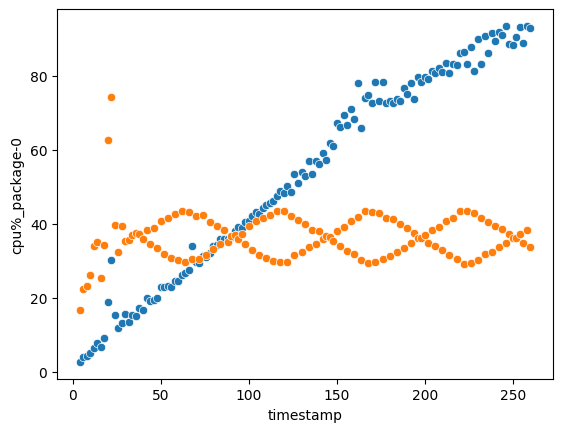

In [73]:
g = sns.scatterplot(data=dataset_def, x='timestamp', y='cpu%_package-0')
g = sns.scatterplot(data=dataset_def, x='timestamp', y='package-global-joule')

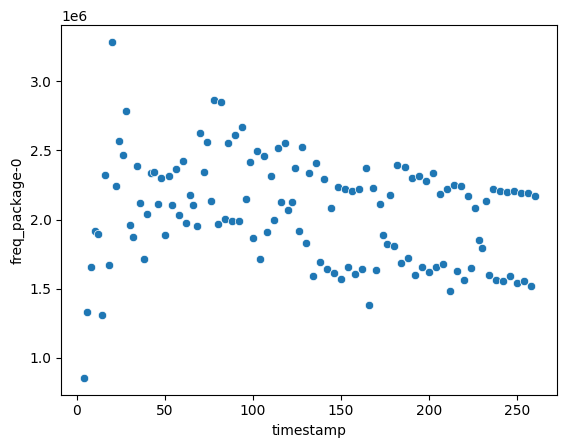

In [74]:
g = sns.scatterplot(data=dataset_def, x='timestamp', y='freq_package-0')
